In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
learning_rate = 0.01
training_epochs = 1000

In [3]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [4]:
x1 = np.random.normal(-4,2,1000)
x2 = np.random.normal(4,2,1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

In [16]:
plt.scatter(xs, ys)

In [8]:
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0.,0.], name="placeholder", trainable=True)
y_model = tf.sigmoid(w[1] * X + w[0])
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))

In [9]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_error = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})
        print(epoch, err)
        if abs(prev_error - err) < 0.0001:
            break
        prev_error = err
    w_val = sess.run(w, {X: xs, Y: ys})

0 0.693146
1 0.654467
2 0.619554
3 0.588015
4 0.559481
5 0.533621
6 0.510131
7 0.488744
8 0.469223
9 0.451359
10 0.434967
11 0.419887
12 0.405979
13 0.393119
14 0.381199
15 0.370125
16 0.359814
17 0.350191
18 0.341192
19 0.332761
20 0.324845
21 0.3174
22 0.310387
23 0.303768
24 0.297512
25 0.29159
26 0.285976
27 0.280647
28 0.275582
29 0.27076
30 0.266166
31 0.261783
32 0.257597
33 0.253595
34 0.249765
35 0.246096
36 0.242577
37 0.239201
38 0.235957
39 0.232839
40 0.229839
41 0.22695
42 0.224166
43 0.221482
44 0.218892
45 0.21639
46 0.213974
47 0.211637
48 0.209377
49 0.207189
50 0.20507
51 0.203017
52 0.201026
53 0.199095
54 0.19722
55 0.1954
56 0.193633
57 0.191915
58 0.190244
59 0.188619
60 0.187038
61 0.185499
62 0.184
63 0.182539
64 0.181116
65 0.179728
66 0.178375
67 0.177055
68 0.175766
69 0.174508
70 0.17328
71 0.17208
72 0.170907
73 0.169761
74 0.16864
75 0.167544
76 0.166472
77 0.165423
78 0.164397
79 0.163392
80 0.162407
81 0.161443
82 0.160499
83 0.159573
84 0.158666
85 0.1

[ 0.00648348  0.93348038]


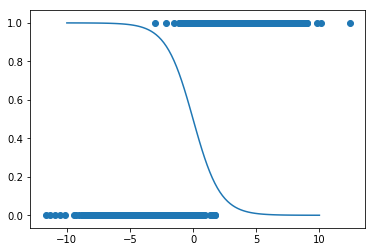

In [17]:
print(w_val)
all_xs = np.linspace(-10, 10, 100)
plt.plot(all_xs, sigmoid(-(all_xs * w_val[1] + w_val[0])))
plt.show()